# In this notebook, let's try to implement the functional API

In [29]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train) , (X_test, y_test)= tf.keras.datasets.cifar10.load_data()

**Procedure:**

1. For each image, need to do rescaling
2. Pass in the inputs into a preprocessing model
3. From the output, map it to 10 neurons using a softmax function
4. Fit using sparsecrossentropy

array([6], dtype=uint8)

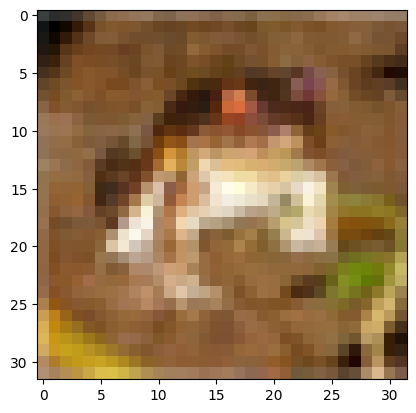

In [34]:
plt.imshow(X_train[0])
y_train[0]

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Creating a simple neural network without convolution

Architecture:
1. Rescale
2. Flatten inputs
3. Hidden layer 1 with 100 units
4. Output layer with 10 units

In [21]:
# Set random seed
tf.random.set_seed(42)

# Creating the input tensor for each image
inputs = tf.keras.Input(shape=(32,32,3))

# Create a rescaling layer and pass the inputs into it
rescaler = tf.keras.layers.Rescaling(scale=1./255)
rescaled_inputs = rescaler(inputs)

# Flatten inputs
flatten_layer = tf.keras.layers.Flatten()
flattened_inputs = flatten_layer(rescaled_inputs)

# Pass into first Dense layer
dense_1 = tf.keras.layers.Dense(100, activation='relu')
dense_1_output = dense_1(flattened_inputs)

# Pass into output layer
output_layer = tf.keras.layers.Dense(10, activation='softmax')
output = output_layer(dense_1_output)

In [22]:
# Creating the model
functional_model = tf.keras.Model(inputs=inputs, outputs=output)

# See the summary
functional_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               307300    
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


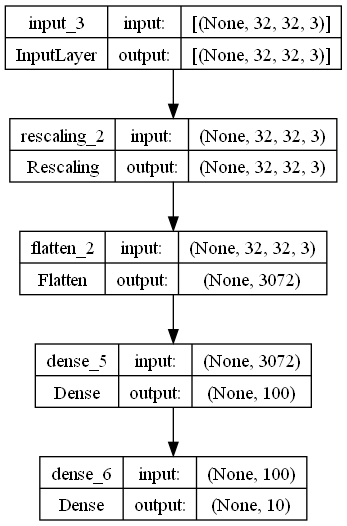

In [23]:
# See the plot
tf.keras.utils.plot_model(functional_model, show_shapes=True)

In [24]:
# Compile and fit the model
functional_model.compile(optimizer='adam', 
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                         metrics=[tf.keras.losses.SparseCategoricalCrossentropy(), 'accuracy'])

history = functional_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9198 - sparse_categorical_crossentropy: 1.9198 - accuracy: 0.3030 - val_loss: 1.8260 - val_sparse_categorical_crossentropy: 1.8264 - val_accuracy: 0.3508
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7868 - sparse_categorical_crossentropy: 1.7868 - accuracy: 0.3551 - val_loss: 1.7827 - val_sparse_categorical_crossentropy: 1.7835 - val_accuracy: 0.3592
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7348 - sparse_categorical_crossentropy: 1.7348 - accuracy: 0.3729 - val_loss: 1.7211 - val_sparse_categorical_crossentropy: 1.7214 - val_accuracy: 0.3843
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6978 - sparse_categorical_crossentropy: 1.6978 - accuracy: 0.3887 - val_loss: 1.6832 - val_sparse_categorical_crossentropy: 1.6837 - val_accuracy: 0.4003
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - lo

In [32]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,sparse_categorical_crossentropy,accuracy,val_loss,val_sparse_categorical_crossentropy,val_accuracy
0,1.919819,1.919819,0.302975,1.826004,1.826397,0.3508
1,1.786820,1.786820,0.355125,1.782697,1.783462,0.3592
2,1.734803,1.734803,0.372900,1.721104,1.721402,0.3843
3,1.697777,1.697777,0.388650,1.683179,1.683701,0.4003
4,1.673871,1.673871,0.399075,1.681315,1.681652,0.3998


In [125]:
def plot_loss_curves(df):
    epochs = range(1 ,len(df)+1)
    train_loss = df['accuracy']
    val_loss = df['val_accuracy']
    plt.figure(figsize=(6,6))
    plt.plot(epochs, train_loss, label='training_acc')
    plt.plot(epochs, val_loss, label='validation_acc')
    plt.legend()
    plt.show()

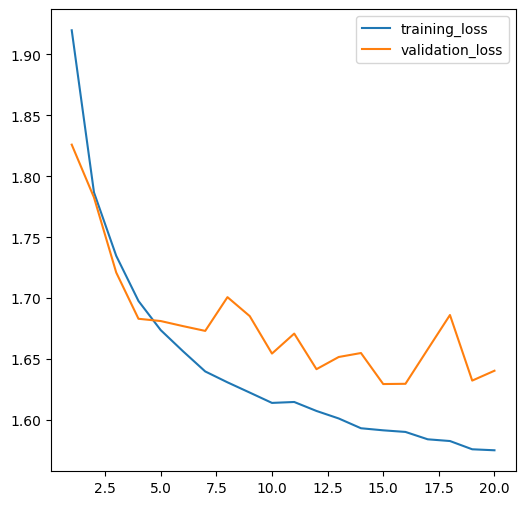

In [40]:
plot_loss_curves(history_df)

## Creating another neural network that is deeper without convolution

In [25]:
# Set random seed
tf.random.set_seed(42)

# Creating the input tensor for each image
inputs = tf.keras.Input(shape=(32,32,3))

# Create a rescaling layer and pass the inputs into it
rescaler = tf.keras.layers.Rescaling(scale=1./255)
rescaled_inputs = rescaler(inputs)

# Flatten inputs
flatten_layer = tf.keras.layers.Flatten()
flattened_inputs = flatten_layer(rescaled_inputs)

# Pass into first Dense layer
dense_1 = tf.keras.layers.Dense(100, activation='relu')
dense_1_output = dense_1(flattened_inputs)

# Pass into second Dense layer
dense_2 = tf.keras.layers.Dense(50, activation='relu')
dense_2_output = dense_2(dense_1_output)

# Pass into output layer
output_layer = tf.keras.layers.Dense(10, activation='softmax')
output = output_layer(dense_2_output)

In [26]:
# compile and fit second model
functional_model_2 = tf.keras.Model(inputs=inputs, outputs=output)
functional_model_2.compile(optimizer='adam',
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])
functional_model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 100)               307300    
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
Total params: 312,860
Trainable params: 312,860
Non-trainab

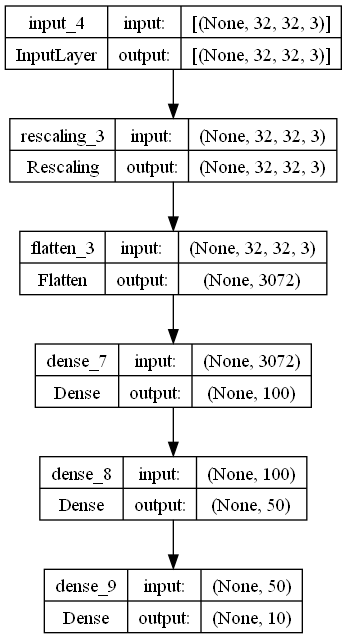

In [27]:
tf.keras.utils.plot_model(functional_model_2, show_shapes=True)

In [30]:
history_2 = functional_model_2.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 13s 10ms/step - loss: 1.9045 - accuracy: 0.3113 - val_loss: 1.7789 - val_accuracy: 0.3681
Epoch 2/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7364 - accuracy: 0.3773 - val_loss: 1.7999 - val_accuracy: 0.3605
Epoch 3/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6828 - accuracy: 0.3987 - val_loss: 1.6693 - val_accuracy: 0.4074
Epoch 4/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6477 - accuracy: 0.4114 - val_loss: 1.6663 - val_accuracy: 0.4060
Epoch 5/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6171 - accuracy: 0.4214 - val_loss: 1.6206 - val_accuracy: 0.4133
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5925 - accuracy: 0.4315 - val_loss: 1.6390 - val_accuracy: 0.4107
Epoch 7/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5703 - accuracy: 0.4425 - val_loss: 1.6483 - v

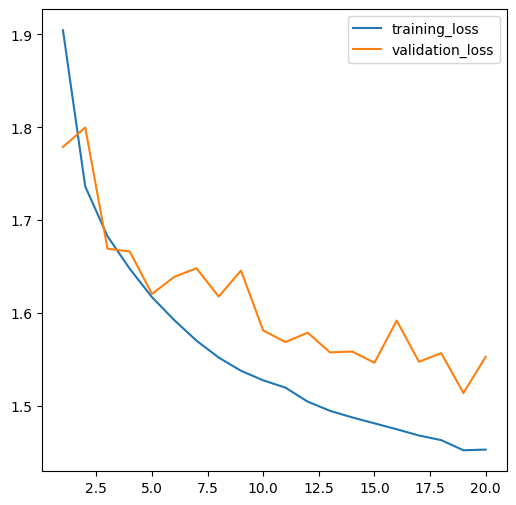

In [41]:
# history_2 df
history_2_df = pd.DataFrame(history_2.history)

# plot loss curve
plot_loss_curves(history_2_df)

## Try using 1 convolutional block while keeping the same architecture as first model

In [42]:
# Set random seed
tf.random.set_seed(42)

# Creating the input tensor for each image
inputs = tf.keras.Input(shape=(32,32,3))

# Creating the first convolutional block convolute => max pooling
convolute_layer = tf.keras.layers.Conv2D(filters=64, padding='same', kernel_size=2, strides=2)
convoluted_inputs = convolute_layer(inputs)
max_pooling_layer = tf.keras.layers.MaxPool2D(strides=2, padding='same')
pooled_inputs = max_pooling_layer(convoluted_inputs)

# Create a rescaling layer and pass the inputs into it
rescaler = tf.keras.layers.Rescaling(scale=1./255)
rescaled_inputs = rescaler(pooled_inputs)

# Flatten inputs
flatten_layer = tf.keras.layers.Flatten()
flattened_inputs = flatten_layer(rescaled_inputs)

# Pass into first Dense layer
dense_1 = tf.keras.layers.Dense(100, activation='relu')
dense_1_output = dense_1(flattened_inputs)

# Pass into output layer
output_layer = tf.keras.layers.Dense(10, activation='softmax')
output = output_layer(dense_1_output)

In [43]:
functional_model_3 = tf.keras.Model(inputs=inputs, outputs=output)
functional_model_3.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 rescaling_4 (Rescaling)     (None, 8, 8, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               409700    
                                                           

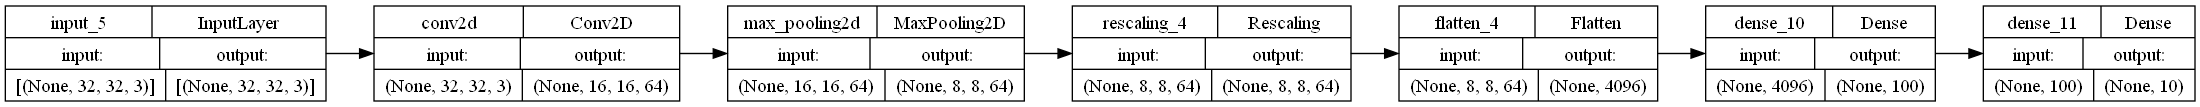

In [45]:
# Plot the architecture
tf.keras.utils.plot_model(functional_model_3, show_shapes=True, rankdir='LR')

In [46]:
# Compile the model
functional_model_3.compile(optimizer='adam',
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

In [47]:
# Fit the model
history_3 = functional_model_3.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 14s 10ms/step - loss: 1.5966 - accuracy: 0.4348 - val_loss: 1.3917 - val_accuracy: 0.5116
Epoch 2/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.3073 - accuracy: 0.5416 - val_loss: 1.2728 - val_accuracy: 0.5526
Epoch 3/20
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1838 - accuracy: 0.5864 - val_loss: 1.2528 - val_accuracy: 0.5651
Epoch 4/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0924 - accuracy: 0.6170 - val_loss: 1.1823 - val_accuracy: 0.5927
Epoch 5/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0195 - accuracy: 0.6410 - val_loss: 1.1488 - val_accuracy: 0.6027
Epoch 6/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.9560 - accuracy: 0.6676 - val_loss: 1.1689 - val_accuracy: 0.6046
Epoch 7/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9000 - accuracy: 0.6857 - val_loss: 1.1749 -

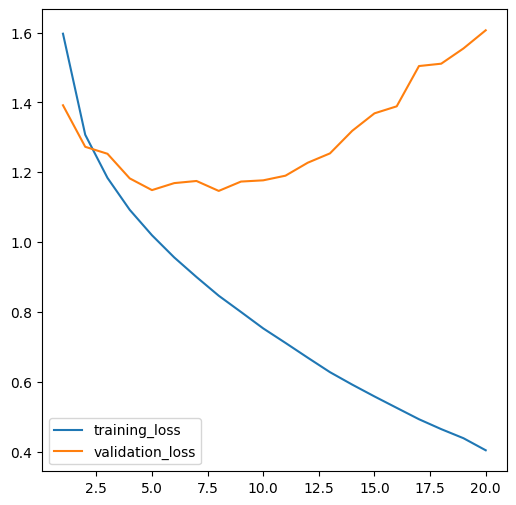

In [55]:
history_3_df = pd.DataFrame(history_3.history)
plot_loss_curves(history_3_df)
# Need some regularization terms

## Try changing the stride length to conserve more information

In [63]:
# Set random seed
tf.random.set_seed(42)

# Creating the input tensor for each image
inputs = tf.keras.Input(shape=(32,32,3))

# Creating the first convolutional block convolute => max pooling
convolute_layer = tf.keras.layers.Conv2D(filters=64, padding='same', kernel_size=2, strides=1)
convoluted_inputs = convolute_layer(inputs)
max_pooling_layer = tf.keras.layers.MaxPool2D(strides=2, padding='same')
pooled_inputs = max_pooling_layer(convoluted_inputs)

# Create a rescaling layer and pass the inputs into it
rescaler = tf.keras.layers.Rescaling(scale=1./255)
rescaled_inputs = rescaler(pooled_inputs)

# Flatten inputs
flatten_layer = tf.keras.layers.Flatten()
flattened_inputs = flatten_layer(rescaled_inputs)

# Pass into first Dense layer
dense_1 = tf.keras.layers.Dense(100, activation='relu')
dense_1_output = dense_1(flattened_inputs)

# Use dropout layer
dropout = tf.keras.layers.Dropout(0.4)
dense_1_output = dropout(dense_1_output)

# Pass into output layer
output_layer = tf.keras.layers.Dense(10, activation='softmax')
output = output_layer(dense_1_output)

In [64]:
functional_model_4 = tf.keras.Model(inputs=inputs, outputs=output)
functional_model_4.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 rescaling_8 (Rescaling)     (None, 16, 16, 64)        0         
                                                                 
 flatten_8 (Flatten)         (None, 16384)             0         
                                                                 
 dense_23 (Dense)            (None, 100)               1638500   
                                                           

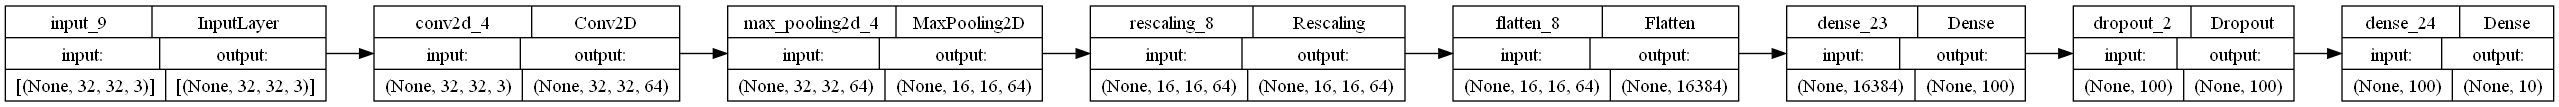

In [65]:
tf.keras.utils.plot_model(functional_model_4, rankdir='LR', show_shapes=True)

In [66]:
# compile the model
functional_model_4.compile(optimizer='adam',
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

In [67]:
# Fit the model
history_4 = functional_model_4.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 1354s 1s/step - loss: 1.9611 - accuracy: 0.2759 - val_loss: 1.6235 - val_accuracy: 0.4272
Epoch 2/20
1250/1250 [==============================] - 39s 31ms/step - loss: 1.6198 - accuracy: 0.4135 - val_loss: 1.4165 - val_accuracy: 0.5053
Epoch 3/20
1250/1250 [==============================] - 38s 31ms/step - loss: 1.4945 - accuracy: 0.4638 - val_loss: 1.3620 - val_accuracy: 0.5281
Epoch 4/20
1250/1250 [==============================] - 39s 31ms/step - loss: 1.4082 - accuracy: 0.4971 - val_loss: 1.2953 - val_accuracy: 0.5509
Epoch 5/20
1250/1250 [==============================] - 38s 30ms/step - loss: 1.3520 - accuracy: 0.5171 - val_loss: 1.2511 - val_accuracy: 0.5653
Epoch 6/20
1250/1250 [==============================] - 39s 31ms/step - loss: 1.3011 - accuracy: 0.5370 - val_loss: 1.2911 - val_accuracy: 0.5445
Epoch 7/20
1250/1250 [==============================] - 38s 30ms/step - loss: 1.2465 - accuracy: 0.5533 - val_loss: 1.2313 -

## Adding another convolutional layer

In [71]:
# Set random seed
tf.random.set_seed(42)

# Creating the input tensor for each image
inputs = tf.keras.Input(shape=(32,32,3))

# Create a rescaling layer and pass the inputs into it
rescaler = tf.keras.layers.Rescaling(scale=1./255)
rescaled_inputs = rescaler(inputs)

# Creating the first convolutional block convolute => max pooling
convolute_layer = tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=2, strides=2)
convoluted_inputs = convolute_layer(rescaled_inputs)
max_pooling_layer = tf.keras.layers.MaxPool2D(strides=2, padding='same')
pooled_inputs = max_pooling_layer(convoluted_inputs)

# Creating the second convolutional block
sec_convolute_layer = tf.keras.layers.Conv2D(filters=128, padding='same', kernel_size=2, strides=2)
convoluted_inputs_2 = sec_convolute_layer(pooled_inputs)
max_pooling_layer_2 = tf.keras.layers.MaxPool2D(strides=2, padding='same')
pooled_inputs_2 = max_pooling_layer_2(convoluted_inputs_2)

# Flatten inputs
flatten_layer = tf.keras.layers.Flatten()
flattened_inputs = flatten_layer(pooled_inputs_2)

# Pass into first Dense layer
dense_1 = tf.keras.layers.Dense(100, activation='relu')
dense_1_output = dense_1(flattened_inputs)

# Use dropout layer
dropout = tf.keras.layers.Dropout(0.4)
dense_1_output = dropout(dense_1_output)

# Pass into output layer
output_layer = tf.keras.layers.Dense(10, activation='softmax')
output = output_layer(dense_1_output)

In [72]:
model_5 = tf.keras.Model(inputs=inputs, outputs=output)

In [73]:
model_5.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [74]:
history_5 = model_5.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 9s 6ms/step - loss: 1.7603 - accuracy: 0.3600 - val_loss: 1.4924 - val_accuracy: 0.4625
Epoch 2/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4570 - accuracy: 0.4766 - val_loss: 1.3220 - val_accuracy: 0.5287
Epoch 3/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3525 - accuracy: 0.5178 - val_loss: 1.2754 - val_accuracy: 0.5506
Epoch 4/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2885 - accuracy: 0.5408 - val_loss: 1.2288 - val_accuracy: 0.5611
Epoch 5/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2384 - accuracy: 0.5606 - val_loss: 1.1843 - val_accuracy: 0.5873
Epoch 6/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1954 - accuracy: 0.5789 - val_loss: 1.1792 - val_accuracy: 0.5853
Epoch 7/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1641 - accuracy: 0.5898 - val_loss: 1.1501 - val_accuracy:

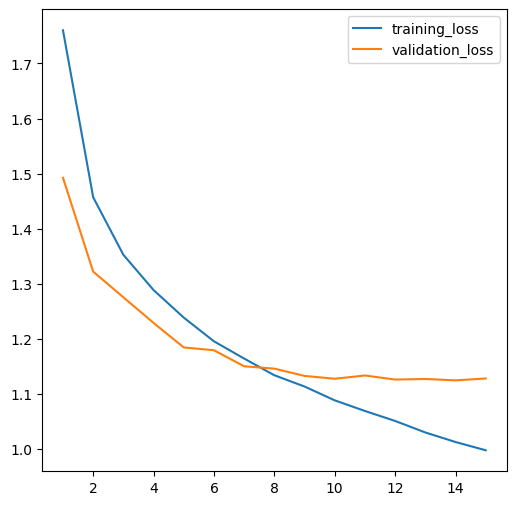

In [75]:
history_5_df = pd.DataFrame(history_5.history)
plot_loss_curves(history_5_df)

In [76]:
# Set random seed
tf.random.set_seed(42)

# Creating the input tensor for each image
inputs = tf.keras.Input(shape=(32,32,3))

# Create a rescaling layer and pass the inputs into it
rescaler = tf.keras.layers.Rescaling(scale=1./255)
rescaled_inputs = rescaler(inputs)

# Creating the first convolutional block convolute => max pooling
convolute_layer = tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=2, strides=2)
convoluted_inputs = convolute_layer(rescaled_inputs)
max_pooling_layer = tf.keras.layers.MaxPool2D(strides=2, padding='same')
pooled_inputs = max_pooling_layer(convoluted_inputs)

# Creating the second convolutional block
sec_convolute_layer = tf.keras.layers.Conv2D(filters=128, padding='same', kernel_size=2, strides=2)
convoluted_inputs_2 = sec_convolute_layer(pooled_inputs)
max_pooling_layer_2 = tf.keras.layers.MaxPool2D(strides=2, padding='same')
pooled_inputs_2 = max_pooling_layer_2(convoluted_inputs_2)

# Flatten inputs
flatten_layer = tf.keras.layers.Flatten()
flattened_inputs = flatten_layer(pooled_inputs_2)

# Pass into first Dense layer
dense_1 = tf.keras.layers.Dense(100, activation='relu')
dense_1_output = dense_1(flattened_inputs)

# Pass into output layer
output_layer = tf.keras.layers.Dense(10, activation='softmax')
output = output_layer(dense_1_output)

In [77]:
model_6 = tf.keras.Model(inputs=inputs, outputs=output)

In [78]:
model_6.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [79]:
history_6 = model_6.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 9s 6ms/step - loss: 1.6618 - accuracy: 0.4001 - val_loss: 1.4483 - val_accuracy: 0.4853
Epoch 2/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3496 - accuracy: 0.5167 - val_loss: 1.2946 - val_accuracy: 0.5399
Epoch 3/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2194 - accuracy: 0.5670 - val_loss: 1.2575 - val_accuracy: 0.5549
Epoch 4/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1318 - accuracy: 0.6003 - val_loss: 1.2043 - val_accuracy: 0.5786
Epoch 5/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0647 - accuracy: 0.6252 - val_loss: 1.1474 - val_accuracy: 0.5981
Epoch 6/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0072 - accuracy: 0.6487 - val_loss: 1.1459 - val_accuracy: 0.5967
Epoch 7/15
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9546 - accuracy: 0.6657 - val_loss: 1.1362 - val_accuracy:

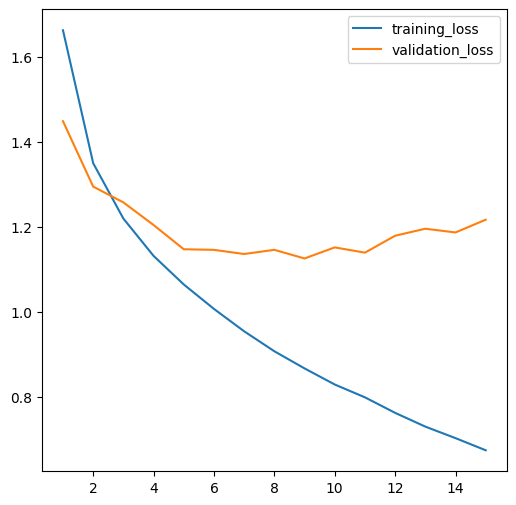

In [83]:
history_6_df = pd.DataFrame(history_6.history)
plot_loss_curves(history_6_df)

## Increase depth

In [80]:
# Set random seed
tf.random.set_seed(42)

# Creating the input tensor for each image
inputs = tf.keras.Input(shape=(32,32,3))

# Create a rescaling layer and pass the inputs into it
rescaler = tf.keras.layers.Rescaling(scale=1./255)
rescaled_inputs = rescaler(inputs)

# Creating the first convolutional block convolute => max pooling
convolute_layer = tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=2, strides=2)
convoluted_inputs = convolute_layer(rescaled_inputs)
max_pooling_layer = tf.keras.layers.MaxPool2D(strides=2, padding='same')
pooled_inputs = max_pooling_layer(convoluted_inputs)

# Creating the second convolutional block
sec_convolute_layer = tf.keras.layers.Conv2D(filters=128, padding='same', kernel_size=2, strides=2)
convoluted_inputs_2 = sec_convolute_layer(pooled_inputs)
max_pooling_layer_2 = tf.keras.layers.MaxPool2D(strides=2, padding='same')
pooled_inputs_2 = max_pooling_layer_2(convoluted_inputs_2)

# Flatten inputs
flatten_layer = tf.keras.layers.Flatten()
flattened_inputs = flatten_layer(pooled_inputs_2)

# Pass into first Dense layer
dense_1 = tf.keras.layers.Dense(50, activation='sigmoid')
dense_1_output = dense_1(flattened_inputs)

# Pass into second Dense layer
dense_2 = tf.keras.layers.Dense(50, activation='relu')
dense_2_output = dense_2(dense_1_output)

# Pass into output layer
output_layer = tf.keras.layers.Dense(10, activation='softmax')
output = output_layer(dense_2_output)

In [81]:
model_7 = tf.keras.Model(inputs=inputs, outputs=output)

In [82]:
model_7.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [84]:
history_7 = model_7.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 9s 6ms/step - loss: 1.6913 - accuracy: 0.3809 - val_loss: 1.4877 - val_accuracy: 0.4632
Epoch 2/15
1250/1250 [==============================] - 8s 7ms/step - loss: 1.3791 - accuracy: 0.5007 - val_loss: 1.3055 - val_accuracy: 0.5260
Epoch 3/15
1250/1250 [==============================] - 8s 7ms/step - loss: 1.2529 - accuracy: 0.5518 - val_loss: 1.2570 - val_accuracy: 0.5541
Epoch 4/15
1250/1250 [==============================] - 8s 7ms/step - loss: 1.1670 - accuracy: 0.5862 - val_loss: 1.2563 - val_accuracy: 0.5601
Epoch 5/15
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1073 - accuracy: 0.6060 - val_loss: 1.1868 - val_accuracy: 0.5830
Epoch 6/15
1250/1250 [==============================] - 8s 7ms/step - loss: 1.0576 - accuracy: 0.6247 - val_loss: 1.1701 - val_accuracy: 0.5888
Epoch 7/15
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0153 - accuracy: 0.6404 - val_loss: 1.1471 - val_accuracy

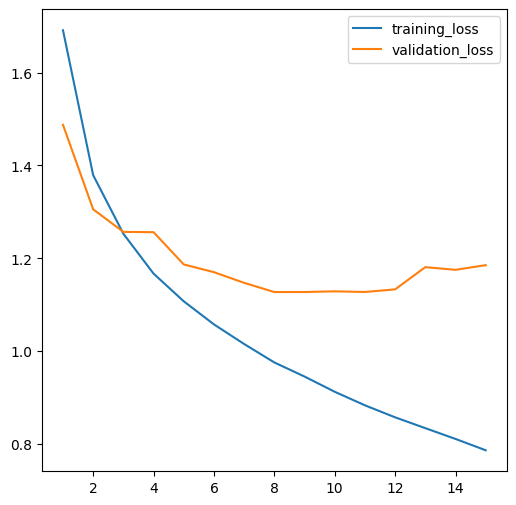

In [86]:
history_7_df = pd.DataFrame(history_7.history)
plot_loss_curves(history_7_df)

In [87]:
# Set random seed
tf.random.set_seed(42)

# Creating the input tensor for each image
inputs = tf.keras.Input(shape=(32,32,3))

# Create a rescaling layer and pass the inputs into it
rescaler = tf.keras.layers.Rescaling(scale=1./255)
rescaled_inputs = rescaler(inputs)

# Creating the first convolutional block convolute => max pooling
convolute_layer = tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=2, strides=2)
convoluted_inputs = convolute_layer(rescaled_inputs)
max_pooling_layer = tf.keras.layers.MaxPool2D(strides=2, padding='same')
pooled_inputs = max_pooling_layer(convoluted_inputs)

# Creating the second convolutional block
sec_convolute_layer = tf.keras.layers.Conv2D(filters=128, padding='same', kernel_size=2, strides=2)
convoluted_inputs_2 = sec_convolute_layer(pooled_inputs)
max_pooling_layer_2 = tf.keras.layers.MaxPool2D(strides=2, padding='same')
pooled_inputs_2 = max_pooling_layer_2(convoluted_inputs_2)

# Flatten inputs
flatten_layer = tf.keras.layers.Flatten()
flattened_inputs = flatten_layer(pooled_inputs_2)

# Pass into first Dense layer
dense_1 = tf.keras.layers.Dense(50, activation='sigmoid')
dense_1_output = dense_1(flattened_inputs)

# Pass into second Dense layer
dense_2 = tf.keras.layers.Dense(50, activation='relu')
dense_2_output = dense_2(dense_1_output)

# Pass into output layer
output_layer = tf.keras.layers.Dense(10, activation='softmax')
output = output_layer(dense_2_output)

In [88]:
model_8 = tf.keras.Model(inputs=inputs, outputs=output)

In [89]:
model_8.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [90]:
history_8 = model_8.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7881 - accuracy: 0.3517 - val_loss: 1.5997 - val_accuracy: 0.4204
Epoch 2/15
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5029 - accuracy: 0.4549 - val_loss: 1.4158 - val_accuracy: 0.4842
Epoch 3/15
1250/1250 [==============================] - 7s 5ms/step - loss: 1.3649 - accuracy: 0.5047 - val_loss: 1.3500 - val_accuracy: 0.5139
Epoch 4/15
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2696 - accuracy: 0.5393 - val_loss: 1.2823 - val_accuracy: 0.5400
Epoch 5/15
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2019 - accuracy: 0.5689 - val_loss: 1.2130 - val_accuracy: 0.5721
Epoch 6/15
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1459 - accuracy: 0.5888 - val_loss: 1.1974 - val_accuracy: 0.5727
Epoch 7/15
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1008 - accuracy: 0.6079 - val_loss: 1.1837 - val_accuracy:

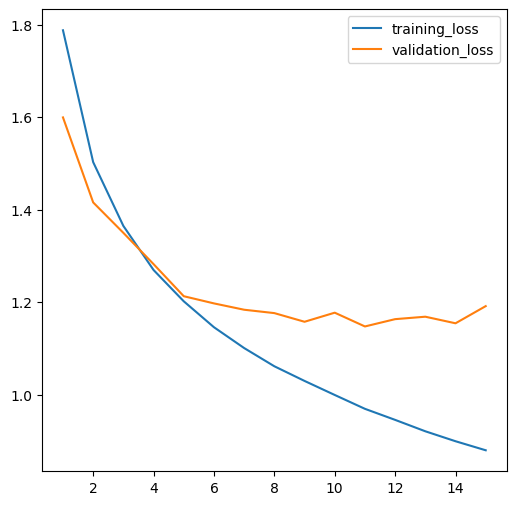

In [91]:
history_8_df = pd.DataFrame(history_8.history)
plot_loss_curves(history_8_df)

In [169]:
# Set random seed
tf.random.set_seed(42)

# Creating the input tensor for each image
inputs = tf.keras.Input(shape=(32,32,3))
rescaled_inputs = tf.keras.layers.Rescaling(scale=1./255)(inputs)

# First conv block
conv_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', strides=1)(rescaled_inputs)
conv_1 = tf.keras.layers.MaxPool2D(padding='same')(conv_1)

# Second conv block conv_2
conv_2 = tf.keras.layers.BatchNormalization()(conv_1)
conv_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', strides=1)(conv_2)
conv_2 = tf.keras.layers.MaxPool2D(padding='valid')(conv_2)

# Third conv block conv_3
conv_3 = tf.keras.layers.BatchNormalization()(conv_2)
conv_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same')(conv_3)
conv_3 = tf.keras.layers.MaxPool2D(padding='same')(conv_3)

# First dense layer
flattened_input = tf.keras.layers.Flatten()(conv_3)
flattened_input = tf.keras.layers.BatchNormalization()(flattened_input)
dense_1 = tf.keras.layers.Dense(512, activation='relu')(flattened_input)
dense_1 = tf.keras.layers.Dropout(0.3)(dense_1)
dense_2 = tf.keras.layers.Dense(256, activation='relu')(dense_1)
dense_2 = tf.keras.layers.Dropout(0.3)(dense_2)
dense_3 = tf.keras.layers.Dense(128, activation='relu')(dense_2)
dense_4 = tf.keras.layers.Dense(64, activation='relu')(dense_3)
output = tf.keras.layers.Dense(10, activation='softmax')(dense_4)

In [170]:
model_9 = tf.keras.Model(inputs=inputs, outputs=output)

In [171]:
model_9.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
model_9.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_32 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_26 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 64)        825

In [172]:
history_9 = model_9.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 58s 45ms/step - loss: 1.5359 - accuracy: 0.4549 - val_loss: 1.2108 - val_accuracy: 0.5729
Epoch 2/15
1250/1250 [==============================] - 56s 45ms/step - loss: 1.1830 - accuracy: 0.5856 - val_loss: 1.2150 - val_accuracy: 0.5866
Epoch 3/15
1250/1250 [==============================] - 58s 46ms/step - loss: 1.0341 - accuracy: 0.6438 - val_loss: 0.9471 - val_accuracy: 0.6759
Epoch 4/15
1250/1250 [==============================] - 63s 50ms/step - loss: 0.9236 - accuracy: 0.6853 - val_loss: 0.9968 - val_accuracy: 0.6649
Epoch 5/15
1250/1250 [==============================] - 68s 55ms/step - loss: 0.8237 - accuracy: 0.7190 - val_loss: 0.9078 - val_accuracy: 0.6943
Epoch 6/15
1250/1250 [==============================] - 60s 48ms/step - loss: 0.7458 - accuracy: 0.7443 - val_loss: 0.8798 - val_accuracy: 0.7029
Epoch 7/15
1250/1250 [==============================] - 58s 46ms/step - loss: 0.6731 - accuracy: 0.7708 - val_loss: 0.8186 -

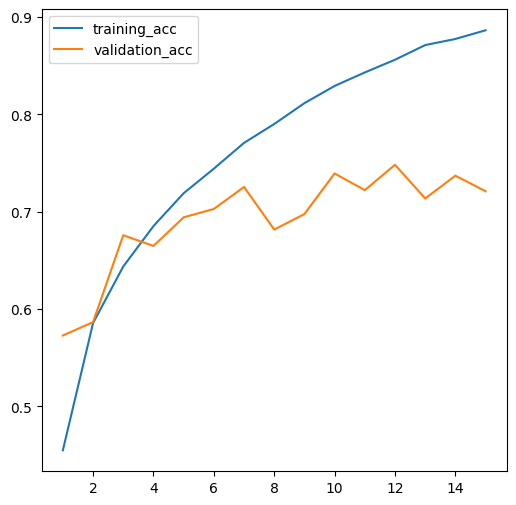

In [173]:
history_9_df = pd.DataFrame(history_9.history)
plot_loss_curves(history_9_df)

In [174]:
model_9.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9390 - accuracy: 0.7256


[0.9389646649360657, 0.725600004196167]